## This scripts generates Figure 3, Supplemental Figure 3, and corresponding data.   

Author: Kexin Dong  
Date: Apr 10, 2024  

## Figure 3b - IDR
This part generates the IDR expanded library of the same amino acid substitution.  

### Run H2M  

In [2]:
import pandas as pd
import h2m
path_h_ref, path_m_ref = '/Users/gorkordkx/Documents/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/gorkordkx/Documents/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/gorkordkx/Documents/Database/Genecode/gencode_v19_GRCh37.db', '/Users/gorkordkx/Documents/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [ ]:
df = pd.read_csv('idr_aacr.csv')

In [ ]:
df_run = df[['COUNT','Hugo_Symbol','Start_Position','End_Position','Reference_Allele','Tumor_Seq_Allele2','HGVSp_Short']]
list_1, list_2, list_3, list_4 = [],[],[],[]
for x in df_run['HGVSp_Short']:
    ref_seq_h, alt_seq_h, start_h, end_h = x[2], x[-1],x[3:-1],x[3:-1]
    list_1.append(ref_seq_h)
    list_2.append(alt_seq_h)
    list_3.append(start_h)
    list_4.append(end_h)
df_run['ref_seq_h'], df_run['alt_seq_h'], df_run['start_h'], df_run['end_h'] = list_1, list_2, list_3, list_4
df_run.rename(columns={'Hugo_Symbol':'gene_name_h'}, inplace=True)
def if_right(x):
    y = True
    if x is not None:
        if len(str(x))>1:
            y = False
    return y
df_run = df_run[[if_right(x) for x in df_run['Reference_Allele']]].reset_index(drop=True)
df_run = h2m.get_tx_batch(df_run, 'h', ver=37)[0]
df_run['type_h'] = 'SNP'
df_run['tx_id_m'] = df_run['tx_id_h']
df_run['start_h'] = [int(x) for x in df_run['start_h']]
df_run['end_h'] = [int(x) for x in df_run['end_h']]
df_run['index'] = list(range(len(df_run)))

df_result_2 = h2m.model_batch(df_run, records_h,index_list_h, records_h, index_list_h, db_h, db_h, coor = 'aa', direction = 'h2h', ver = 37, flank_size = 0,memory_size=10000)
df_result_2[0].to_csv('idr_result.csv')
df_run.to_csv('df_run.csv', index=False)

### Statistics and visualziation  

In [4]:
df_result = pd.read_csv('/Users/gorkordkx/Documents/Output/IDR/idr_result.csv')
df_run = pd.read_csv('/Users/gorkordkx/Documents/Output/IDR/df_run.csv')

In [6]:
df_left = df_result[['gene_name_h_1','gene_id_h_1','tx_id_h_1','chr_h_1','exon_num_h_1',	'strand_h_1','status','class','statement','start_h_2',	'end_h_2',	'ref_seq_h_2',	'alt_seq_h_2',	'HGVSc_h_2',	'HGVSp_h_2',	'index']]
df_merge = pd.merge(df_left, df_run, how = 'left', on = 'index')

In [7]:
df_merge

,gene_name_h_1,gene_id_h_1,tx_id_h_1,chr_h_1,exon_num_h_1,strand_h_1,status,class,statement,start_h_2,...,Tumor_Seq_Allele2,HGVSp_Short,ref_seq_h,alt_seq_h,start_h,end_h,tx_id_h,ref_genome_h,type_h,tx_id_m
0,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,1,Class 1: This mutation can be alternatively mo...,7577094.0,...,A,p.R282W,R,W,282,282,ENST00000269305.4,GRCh37,SNP,ENST00000269305.4
1,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,1,Class 1: This mutation can be alternatively mo...,7577083.0,...,T,p.E285K,E,K,285,285,ENST00000269305.4,GRCh37,SNP,ENST00000269305.4
2,TP53,ENSG00000141510.11,ENST00000269305.4,chr17,10,-,True,1,Class 1: This mutation can be alternatively mo...,7577085.0,...,T,p.E285K,E,K,285,285,ENST00000269305.4,GRCh37,SNP,ENST00000269305.4
3,SRSF2,ENSG00000161547.10,ENST00000392485.2,chr17,2,-,True,1,Class 1: This mutation can be alternatively mo...,74732958.0,...,T,p.P95H,P,H,95,95,ENST00000392485.2,GRCh37,SNP,ENST00000392485.2
4,SRSF2,ENSG00000161547.10,ENST00000392485.2,chr17,2,-,True,1,Class 1: This mutation can be alternatively mo...,74732959.0,...,T,p.P95H,P,H,95,95,ENST00000392485.2,GRCh37,SNP,ENST00000392485.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30489,RAD21,ENSG00000164754.8,ENST00000297338.2,chr8,13,-,True,1,Class 1: This mutation can be alternatively mo...,117864293.0,...,G,p.V455A,V,A,455,455,ENST00000297338.2,GRCh37,SNP,ENST00000297338.2
30490,RAD21,ENSG00000164754.8,ENST00000297338.2,chr8,13,-,True,1,Class 1: This mutation can be alternatively mo...,117864292.0,...,G,p.V455A,V,A,455,455,ENST00000297338.2,GRCh37,SNP,ENST00000297338.2
30491,RAD21,ENSG00000164754.8,ENST00000297338.2,chr8,13,-,True,1,Class 1: This mutation can be alternatively mo...,117864292.0,...,G,p.V455A,V,A,455,455,ENST00000297338.2,GRCh37,SNP,ENST00000297338.2
30492,RAD21,ENSG00000164754.8,ENST00000297338.2,chr8,13,-,True,1,Class 1: This mutation can be alternatively mo...,117864292.0,...,G,p.V455A,V,A,455,455,ENST00000297338.2,GRCh37,SNP,ENST00000297338.2


In [20]:
amino_acids_order = "IVLFCMAWGTSYPHNDQEKR" # hydrophobic to hydrophillic
amino_acids_list = list(amino_acids_order)

list_x, list_y = [],[]
for x in amino_acids_order:
    for y in amino_acids_order:
        list_x.append(x)
        list_y.append(y)

df_add = pd.DataFrame({'ref_aa':list_x,'alt_aa':list_y})
df_add = df_add.drop_duplicates().reset_index(drop=True)
def get_aa_count(df):
    df = pd.DataFrame(df[['ref_seq_h','alt_seq_h']].value_counts()).reset_index(drop=False)
    df.columns = ['ref_aa','alt_aa','counts']
    # add all the possible substitutions
    # df = pd.merge(df, df_add, on = ['ref_aa','alt_aa'], how = 'right')
    # df = df.fillna(0)
    return df
df_original = get_aa_count(df_run)
df_result = get_aa_count(df_merge)
df_result.rename(columns={'counts':'counts_2'}, inplace=True)
df_result = pd.merge(df_result, df_original, on = ['ref_aa','alt_aa'], how = 'inner')
# delete BE unamenable counts
df_result['counts'] = df_result[['counts', 'counts_2']].min(axis=1)
df_result

,ref_aa,alt_aa,counts_2,counts
0,P,L,3114,654
1,S,L,2330,501
2,P,S,2071,443
3,A,T,1872,501
4,A,V,1672,444
...,...,...,...,...
142,F,Y,2,1
143,C,W,2,2
144,K,M,2,2
145,N,I,1,1


In [21]:
df_result.columns = ['ref_aa','alt_aa','counts_h2m_expanded','couts_original']
l_1 = len(df_result[[x==y for x,y in zip(df_result['counts_h2m_expanded'],df_result['couts_original'])]])
print(f'{len(df_result)-l_1} out of {len(df_result)} ({((len(df_result)-l_1)/len(df_result)*100):.2f}%) substitutions are expanded.')

135 out of 147 (91.84%) substitutions are expanded.


In [22]:
import numpy as np
df_result['fc'] = df_result['counts_h2m_expanded']/df_result['couts_original'] 
df_result['lfc'] = [np.log2(x) for x in df_result['fc']]

In [23]:
df_result

,ref_aa,alt_aa,counts_h2m_expanded,couts_original,fc,lfc
0,P,L,3114,654,4.761468,2.251406
1,S,L,2330,501,4.650699,2.217447
2,P,S,2071,443,4.674944,2.224949
3,A,T,1872,501,3.736527,1.901698
4,A,V,1672,444,3.765766,1.912943
...,...,...,...,...,...,...
142,F,Y,2,1,2.000000,1.000000
143,C,W,2,2,1.000000,0.000000
144,K,M,2,2,1.000000,0.000000
145,N,I,1,1,1.000000,0.000000


In [24]:
df_result_fill = pd.merge(df_result, df_add, on = ['ref_aa','alt_aa'], how = 'right')
df_result_fill = df_result_fill.fillna(0)
df_result_fill

,ref_aa,alt_aa,counts_h2m_expanded,couts_original,fc,lfc
0,I,I,0.0,0.0,0.000000,0.000000
1,I,V,252.0,67.0,3.761194,1.911191
2,I,L,50.0,10.0,5.000000,2.321928
3,I,F,22.0,11.0,2.000000,1.000000
4,I,C,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
395,R,D,0.0,0.0,0.000000,0.000000
396,R,Q,1235.0,670.0,1.843284,0.882278
397,R,E,0.0,0.0,0.000000,0.000000
398,R,K,57.0,36.0,1.583333,0.662965


In [ ]:
def sig(x):
    y = 0
    if x == 0:
        y = 1
    return y

In [ ]:
df_result_fill['sig'] = [sig(x) for x in df_result_fill['counts']]

In [ ]:
df_result_fill

,ref_aa,alt_aa,counts_2,counts,fc,lfc,sig
0,I,I,0.0,0.0,0.000000,0.000000,1
1,I,V,252.0,67.0,3.761194,1.911191,0
2,I,L,50.0,10.0,5.000000,2.321928,0
3,I,F,22.0,11.0,2.000000,1.000000,0
4,I,C,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...
395,R,D,0.0,0.0,0.000000,0.000000,1
396,R,Q,1235.0,670.0,1.843284,0.882278,0
397,R,E,0.0,0.0,0.000000,0.000000,1
398,R,K,57.0,36.0,1.583333,0.662965,0


In [ ]:
df_wide = df_result_fill.pivot(index = 'alt_aa', columns = 'ref_aa', values = 'sig').reindex(index=amino_acids_list).reindex(columns=amino_acids_list)
df_wide.to_csv('df_wide_sig.csv')
df_wide = df_result_fill.pivot(index = 'alt_aa', columns = 'ref_aa', values = 'lfc').reindex(index=amino_acids_list).reindex(columns=amino_acids_list)
df_wide.to_csv('df_wide.csv')

In [ ]:
# Additional aa
df_counts = pd.DataFrame(df_merge['index'].value_counts()).reset_index(drop=False)
df_counts.rename(columns={'level_0':'index','index':'counts'},inplace=True)
list_of_covered_index = list(df_counts[df_counts['counts']>1]['index'])
# additional aa change coverage
len(list_of_covered_index)
df = df_merge[df_merge['index'].isin(list_of_covered_index)]
df = pd.DataFrame(df[['ref_seq_h','alt_seq_h']].value_counts()).reset_index(drop=False)
df.columns = ['ref_aa','alt_aa','counts']

In [ ]:
df_temp = df_merge[df_merge['status']==True].reset_index(drop=True)
df_temp = pd.DataFrame(df_temp['index'].value_counts())
df_temp

,index
5286,5
2386,5
6584,5
2389,5
6582,5
...,...
2579,1
5583,1
3034,1
6275,1


In [ ]:
# 8711 out of 9681

In [ ]:
[np.exp2(x) for x in [2.4,2,1.6,1.2,0.8,0.4,0]]

[5.278031643091577,
 4.0,
 3.0314331330207964,
 2.2973967099940698,
 1.7411011265922482,
 1.3195079107728942,
 1.0]

In [ ]:
8711/9681

0.899803739283132

In [ ]:
sizes = [8711, 9681-8711]
colors = ['#4BB161','white']
labels = ['Patients w/ Chrom Regulators','Others']

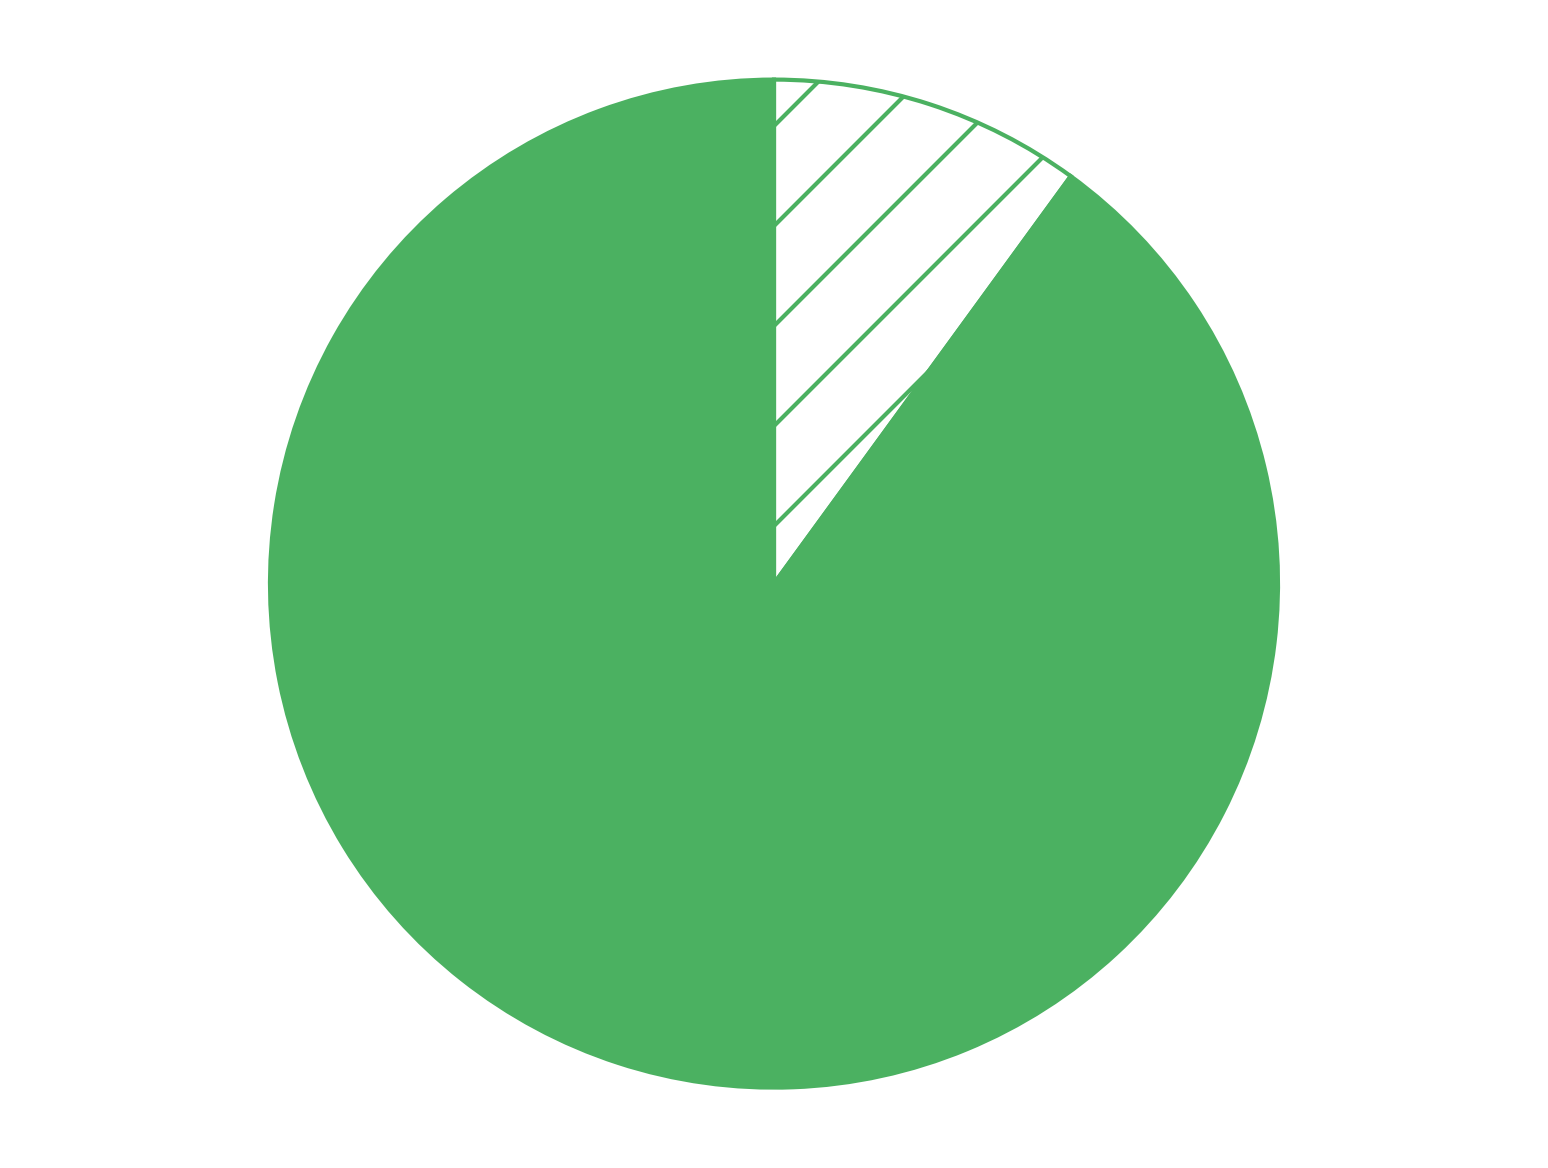

In [ ]:
import matplotlib.patches as mpatches
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=300)
wedges, texts = ax.pie(sizes, colors=colors, startangle=90)
for wedge in wedges:
    p = PathPatch(wedge.get_path(), facecolor='none', edgecolor='none')
    ax.add_patch(p)
    hatch = mpatches.PathPatch(p.get_path(), hatch='/', fill=False, edgecolor=colors[0])
    ax.add_artist(hatch)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('/Users/gorkordkx/Documents/Output/IDR/pie_idr_variants.pdf', dpi = 300)
plt.show()

In [25]:
df_result.to_csv('/Users/gorkordkx/Documents/Output/IDR/idr_statics.csv', index=False)

### Heatmap visualziation see Corralation visualization see 3_case_study_part_visualization.Rmd.  

## Figure 3c - neoantigen
This part generates mouse-to-human mapping of epitope-generative mutations in mouse.  

In [ ]:
df_input  =pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_input.csv', header = 2)
df_input = df_input.drop(0, axis = 0).reset_index(drop=True)
df_input.rename(columns = {'Gene':'gene_name_m'},inplace=True)
df_input['ref_seq_m'] = [x[0] for x in df_input['Substitution']]
df_input['alt_seq_m'] = [x[-1] for x in df_input['Substitution']]
df_input['start_m'] = [int(x[1:-1]) for x in df_input['Substitution']]
df_input['end_m'] = df_input['start_m']
df_input['type_m'] = 'SNP'
df_input = h2m.get_tx_batch(df_input,'m')[0]
df_input = h2m.query_batch(df_input,direction = 'm2h')[0]
df_input = h2m.get_tx_batch(df_input,'h', ver = 37)[0]
df_input['index'] = list(range(len(df_input)))

There were rows that could not be processed.
No error occurs.
No error occurs.


In [ ]:
df_input

,Mutation,gene_name_m,Mutated sequence used for vaccination,Substitution,Reactive T,MHC I score\r\n(best,Response\r\nvaccination,after\r\nwith,ref_seq_m,alt_seq_m,start_m,end_m,type_m,tx_id_m,gene_name_h,tx_id_h,ref_genome_h,index
0,B16-M05,Eef2,FVVKAYLPVNESFAFTADLRSNTGGQA,G795A,CD4+,1.1,X,NaN,G,A,795,795,SNP,ENSMUST00000047864.11,EEF2,ENST00000309311.6,GRCh37,0
1,B16-M08,Ddx23,ANFESGKHKYRQTAMFTATMPPAVERL,V602A,CD4+,1.3,NaN,X,V,A,602,602,SNP,ENSMUST00000003450.15,DDX23,ENST00000308025.3,GRCh37,1
2,B16-M12,Gnas,TPPPEEAMPFEFNGPAQGDHSQPPLQV,S111G,CD4+,1.2,X,NaN,S,G,111,111,SNP,ENSMUST00000185956.7,GNAS,ENST00000371100.4,GRCh37,2
3,B16-M17,Tnpo3,VVDRNPQFLDPVLAYLMKGLCEKPLAS,G504A,CD4+,1,X,NaN,G,A,504,504,SNP,ENSMUST00000115251.8,TNPO3,ENST00000265388.5,GRCh37,3
4,B16-M20,Tubb3,FRRKAFLHWYTGEAMDEMEFTEAESNM,G402A,CD4+,1.9,X,NaN,G,A,402,402,SNP,ENSMUST00000071134.4,TUBB3,ENST00000556922.1,GRCh37,4
5,B16-M21,Atp11a,SSPDEVALVEGVQSLGFTYLRLKDNYM,R552S,CD4+,0.1,NaN,X,R,S,552,552,SNP,ENSMUST00000091237.12,ATP11A,ENST00000487903.1,GRCh37,5
6,B16-M22,Asf1b,PKPDFSQLORNILPSNPRVTRFHINWD,A141P,CD4+,1.7,X,NaN,A,P,141,141,SNP,ENSMUST00000005607.9,ASF1B,ENST00000263382.3,GRCh37,6
7,B16-M24,Dag1,TAVITPPTTTKKARVSTPKPATPSTD,P425A,CD4+,2.2,X,NaN,P,A,425,425,SNP,ENSMUST00000191899.6,DAG1,ENST00000545947.1,GRCh37,7
8,B16-M25,Plod1,STANYNTSHLNNDVWQIFENPVDWKEK,F530V,CD4+,0.1,X,X,F,V,530,530,SNP,ENSMUST00000019199.14,PLOD1,ENST00000196061.4,GRCh37,8
9,B16-M27,Obsl1,REGVELCPGNKYEMRRHGTTHSLVIHD,T1764M,CD8+,2.3,X,X,T,M,1764,1764,SNP,ENSMUST00000113567.10,OBSL1,ENST00000404537.1,GRCh37,9


In [ ]:
df_result = h2m.model_batch(df_input, records_h, index_list_h, records_m, index_list_m, db_h, db_m, ver = 37, flank_size = 0, direction = 'm2h', coor = 'aa', show_sequence=True)

There were rows that could not be processed.


In [ ]:
df_result[0]

,gene_name_m,gene_id_m,tx_id_m,chr_m,exon_num_m,strand_m,matcm,start_m,end_m,ref_seq_m,...,new_seq_h_ori,human_tx_idx_ori,human_p_idx_ori,human_new_p_idx_ori,dist_h,new_seq_h,human_tx_idx,human_p_idx,human_new_p_idx,index
0,Eef2,ENSMUSG00000034994.11,ENSMUST00000047864.11,chr10,14,+,False,81017459,81017724,GGTGAGTGTCTGGTCCCTGGGGTTTGCAGATAACCTGCAAGGCCTG...,...,ATGGTGAACTTCACGGTAGACCAGATCCGCGCCATCATGGACAAGA...,"[2382, 2383, 2384]",[794],[794],None,ATGGTGAACTTCACGGTAGACCAGATCCGCGCCATCATGGACAAGA...,"[2382, 2383, 2384]",[794],[794],0
1,Ddx23,ENSMUSG00000003360.16,ENSMUST00000003450.15,chr15,16,-,True,98545501,98545503,GAC,...,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1806, 1807, 1808]",[602],[602],NaN,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1807, 1808]","[602, 602]",[602],1
2,Ddx23,ENSMUSG00000003360.16,ENSMUST00000003450.15,chr15,16,-,True,98545501,98545503,GAC,...,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1806, 1807, 1808]",[602],[602],NaN,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1807, 1808]","[602, 602]",[602],1
3,Ddx23,ENSMUSG00000003360.16,ENSMUST00000003450.15,chr15,16,-,True,98545501,98545503,GAC,...,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1806, 1807, 1808]",[602],[602],NaN,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1807, 1808]","[602, 602]",[602],1
4,Ddx23,ENSMUSG00000003360.16,ENSMUST00000003450.15,chr15,16,-,True,98545501,98545503,GAC,...,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,"[1806, 1807, 1808]",[602],[602],NaN,ATGGCAGGAGAGCTGGCTGACAAAAAGGACCGTGATGCATCACCTT...,[1807],[602],[602],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Rragd,ENSMUSG00000028278.15,ENSMUST00000029946.14,chr4,8,+,True,33004346,33004348,CTG,...,ATGAGCCAGGTGCTGGGGAAGCCGCAGCCGCAGGACGAGGACGACG...,"[639, 640, 641]",[213],[213],NaN,ATGAGCCAGGTGCTGGGGAAGCCGCAGCCGCAGGACGAGGACGACG...,[640],[213],[213],48
149,Zzz3,ENSMUSG00000039068.17,ENSMUST00000106100.9,chr3,11,+,False,152133874,152133876,GTT,...,None,None,None,None,None,None,None,None,None,49
150,Ilkap,ENSMUSG00000026309.15,ENSMUST00000027534.13,chr1,12,-,False,91318894,91318896,CAC,...,None,None,None,None,None,None,None,None,None,50
151,Cenpf,ENSMUSG00000026605.15,ENSMUST00000171929.8,chr1,17,-,True,189389850,189389852,GTC,...,ATGAGCTGGGCTTTGGAAGAATGGAAAGAAGGGCTGCCTACAAGAG...,"[3966, 3967, 3968]",[1322],[1322],NaN,ATGAGCTGGGCTTTGGAAGAATGGAAAGAAGGGCTGCCTACAAGAG...,[3968],[1322],[1322],51


In [ ]:
df_mutation_mouse = df_result[0]

In [ ]:
df_mutation = pd.read_csv('/Users/gorkordkx/Desktop/Flab - Drylab/Database/AACR-GENIE/v15.0/data_mutations_extended.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')
# df_mutation_mouse = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/m2h_result_v1_march_24_complete_count_over_1.csv')
df_mutation_mouse = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_output_show_sequence_updated.csv')
df_input_raw =pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_input.csv', header = 2)
df_input_raw = df_input_raw.drop(0, axis = 0).reset_index(drop=True)

In [ ]:
df = df_input[['gene_name_m']]
df_to_merge = df_input_raw[['Gene','Reactive T']].rename(columns = {'Gene':'gene_name_m','Reactive T':'T'})
df = pd.merge(df, df_to_merge, how = 'left',on = 'gene_name_m')
df = pd.merge(df, df_mutation_mouse, how = 'right',on = 'gene_name_m')
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_output_complete.csv',index=False)

In [ ]:
df = df[df['status']==True].reset_index(drop=True)
df = df.drop_duplicates(subset = 'index').reset_index(drop=True)

In [ ]:
import ast
list_of_epitope_h = []
for z,(x,y) in enumerate(zip(df['human_p_idx_ori'],df['new_seq_h'])):
    if x != None:
        seq = h2m.Translate(y)
        loc = ast.literal_eval(x)[0]
        list_of_epitope_h.append(''.join(seq[p] for p in range(max(0,(loc-7)),min(len(seq)-1,(loc+8)))))
    else:
        list_of_epitope_h.append('')

list_of_epitope_m = []
for z,(x,y) in enumerate(zip(df['mouse_p_idx'],df['new_seq_m'])):
    if x != None:
        seq = h2m.Translate(y)
        loc = ast.literal_eval(x)[0]
        list_of_epitope_m.append(''.join(seq[p] for p in range(max(0,(loc-7)),min(len(seq)-1,(loc+8)))))
    else:
        list_of_epitope_m.append('')

In [ ]:
df['list_of_epitope_h'] = list_of_epitope_h
df['list_of_epitope_m'] = list_of_epitope_m
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_output.csv', index = False)

### generate txt files for MHC epi prediction  

In [7]:
df = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/neoantigen_output.csv')

In [8]:
df_epi = df.drop_duplicates(subset = 'index').reset_index(drop=True)
df_mhcii = df_epi[['4' in x for x in df_epi['T']]].reset_index(drop=True)
df_mhci = df_epi[['8' in x for x in df_epi['T']]].reset_index(drop=True)

In [ ]:
for index, x in df_mhcii.iterrows():
    k = x['index']
    l = x['list_of_epitope_h']
    with open('/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhcii_h.txt', 'a') as file:
        file.writelines(f'>{k}\n{l}\n')
    l = x['list_of_epitope_m']
    with open('/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhcii_m.txt', 'a') as file:
        file.writelines(f'>{k}\n{l}\n')

In [ ]:
for index, x in df_mhci.iterrows():
    k = x['index']
    l = x['list_of_epitope_h']
    with open('/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhci_h.txt', 'a') as file:
        file.writelines(f'>{k}\n{l}\n')
    l = x['list_of_epitope_m']
    with open('/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhci_m.txt', 'a') as file:
        file.writelines(f'>{k}\n{l}\n')

In [1]:
def process_mhc_result(path):
    result_h_i = pd.read_csv(f'/Users/gorkordkx/Documents/Output/h2m/neoantigen/{path}.txt', header=0, sep='\t', comment="#")

    def isin(df):
        def single(x,y):
            if 8 in list(range(int(x),int(y)+1)):
                return True
            else:
                return False
        df = df[[single(x,y) for x,y in zip(df['start'], df['end'])]]
        df = df.reset_index(drop=True)
        return df

    result_h_i = isin(result_h_i)
    result_h_i.to_csv(f'/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhc{path}_result_rank.csv',index=False)
    result_h_i = result_h_i.drop_duplicates(subset = 'index').reset_index(drop=True)
    result_h_i.to_csv(f'/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhc{path}_result_rank_top.csv',index=False)
    return result_h_i

### visualization of pir plot  

In [3]:
result_h_i, result_h_ii, result_m_i, result_m_ii = [process_mhc_result(x) for x in ['i_h','ii_h','i_m','ii_m']]

In [4]:
result_h_i['s'] = 'h'
result_h_ii['s'] = 'h'
result_m_i['s'] = 'm'
result_m_ii['s'] = 'm'

result_h_i['t'] = 'i'
result_h_ii['t'] = 'ii'
result_m_i['t'] = 'i'
result_m_ii['t'] = 'ii'

result_i = pd.merge(result_h_i, result_m_i, on = ['index','t'], how = 'outer')
result_ii = pd.merge(result_h_ii, result_m_ii, on = ['index','t'], how = 'outer')

In [5]:
result_i

,allele_x,index,start_x,end_x,length_x,peptide_x,score_x,percentile_rank_x,s_x,t,allele_y,start_y,end_y,length_y,peptide_y,score_y,percentile_rank_y,s_y
0,HLA-A*68:01,2,1,9,9,ETLAGFWAR,0.958193,0.03,h,i,HLA-A*68:01,1,9,9,ETLAGFWAR,0.958193,0.03,m
1,HLA-A*11:01,6,1,9,9,AVYDIFVFH,0.828592,0.06,h,i,HLA-A*11:01,1,9,9,AVYDIFVFH,0.828592,0.06,m
2,HLA-B*08:01,3,1,9,9,FGKIRFRNT,0.079437,1.50,h,i,HLA-B*08:01,1,9,9,FGKIRFRNT,0.079437,1.50,m
3,HLA-A*31:01,7,1,9,9,VQELIYDLR,0.059192,2.80,h,i,HLA-A*31:01,1,9,9,VQELIYDLR,0.059192,2.80,m
4,HLA-A*02:06,1,1,9,9,IILKDALNM,0.058739,2.40,h,i,HLA-A*02:06,1,9,9,VILRDALHM,0.049220,2.70,m
5,HLA-A*30:01,4,1,9,9,PSYATYLQP,0.003756,15.00,h,i,HLA-A*30:01,1,9,9,PSYATYLQP,0.003756,15.00,m
6,HLA-A*01:01,5,1,9,9,KDSYIALVD,0.000039,67.00,h,i,HLA-A*01:01,1,9,9,KDSYIALVD,0.000039,67.00,m


In [9]:
df_mhci['index'] = list(range(1,1+len(df_mhci)))
df_mhcii['index'] = list(range(1,1+len(df_mhcii)))
df_result_i = pd.merge(result_i, df_mhci, on = 'index', how = 'outer').sort_values(by = 'index').drop_duplicates().reset_index(drop=True)
df_result_ii = pd.merge(result_ii, df_mhcii, on = 'index', how = 'outer').sort_values(by = 'index').drop_duplicates().reset_index(drop=True)
df_result = pd.concat([df_result_i, df_result_ii],ignore_index=True)
df_result['name'] = [f'{gene_name_m} {HGVSp_m} | {gene_name_h} {HGVSp_h}' for gene_name_m,HGVSp_m,gene_name_h,HGVSp_h in zip(df_result['gene_name_m'],df_result['HGVSp_m'], df_result['gene_name_h'], df_result['HGVSp_h'] )]

In [20]:
df_sub_for_plot = df_result[['gene_name_h','T','name','score_x','peptide_x','core_peptide_x','score_y','peptide_y','core_peptide_y']].reset_index(drop=True).drop_duplicates().reset_index(drop=True)

In [21]:
df_sub_for_plot['T'] = [x[:3] for x in df_sub_for_plot['T']]
df_sub_for_plot.columns = ['gene_name_h','MHC','label_name','score_h','peptide_h','cor_peptide_h','score_m','peptide_m','cor_peptide_m']

In [25]:
df_sub_for_plot['observed'] = False
df_sub_for_plot.iloc[[25,36,31],9] = True

In [26]:
df_sub_for_plot['pep_matched'] = [str(x)==str(y) for x,y in zip(df_sub_for_plot['peptide_h'],df_sub_for_plot['peptide_m'])]
df_sub_for_plot['core_pep_matched'] = [str(x)==str(y) for x,y in zip(df_sub_for_plot['cor_peptide_h'],df_sub_for_plot['cor_peptide_h'])]
df_sub_for_plot.iloc[:7,-1] = None
df_sub_for_plot

,gene_name_h,MHC,label_name,score_h,peptide_h,cor_peptide_h,score_m,peptide_m,cor_peptide_m,observed,pep_matched,core_pep_matched
0,PBK,CD8,Pbk V145D | PBK V146D,0.058739,IILKDALNM,NaN,0.049220,VILRDALHM,NaN,False,False,NaN
1,GPC1,CD8,Gpc1 E165G | GPC1 E165G,0.958193,ETLAGFWAR,NaN,0.958193,ETLAGFWAR,NaN,False,True,NaN
2,TMEM87A,CD8,Tmem87a L63R | TMEM87A L59R,0.079437,FGKIRFRNT,NaN,0.079437,FGKIRFRNT,NaN,False,True,NaN
3,E2F8,CD8,E2f8 I522T | E2F8 I523T,0.003756,PSYATYLQP,NaN,0.003756,PSYATYLQP,NaN,False,True,NaN
4,ALS2,CD8,Als2 L675I | ALS2 L681I,0.000039,KDSYIALVD,NaN,0.000039,KDSYIALVD,NaN,False,True,NaN
5,TMTC2,CD8,Tmtc2 V201I | TMTC2 V201I,0.828592,AVYDIFVFH,NaN,0.828592,AVYDIFVFH,NaN,False,True,NaN
6,WDR11,CD8,Wdr11 T340I | WDR11 T340I,0.059192,VQELIYDLR,NaN,0.059192,VQELIYDLR,NaN,False,True,NaN
7,DDX23,CD4,Ddx23 V602A | DDX23 V603A,0.547900,KHKYRQTAMFTATMP,YRQTAMFTA,0.547900,KHKYRQTAMFTATMP,YRQTAMFTA,False,True,True
8,GNAS,CD4,Gnas Q111G | GNAS Q108G,0.061500,AMPFEAEGPSLGGFW,FEAEGPSLG,0.018400,EAMPFETGQPSLGDF,FETGQPSLG,False,False,True
9,TNPO3,CD4,Tnpo3 G504A | TNPO3 G504A,0.021400,QFLDPVLAYLMKGLC,VLAYLMKGL,0.021400,QFLDPVLAYLMKGLC,VLAYLMKGL,False,True,True


In [27]:
df_sub_for_plot.to_csv('/Users/gorkordkx/Documents/Output/h2m/neoantigen/mhc_result_rank_top.csv', index = False)

### Corralation visualization see 3_case_study_part_visualization.Rmd

## Figure 3d - paralogues  
This part generates mouse-to-human mapping of epitope-generative mutations in mouse.  

In [ ]:
df_paralog = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/paralog.txt', header=0, sep='\t', comment="#", na_values = 'Not Applicable')
df_paralog = df_paralog[df_paralog['Gene pair class']=='Paralogous_gene_pair'].reset_index(drop=True)
list_x, list_y = [],[]
for x in df_paralog['GENE PAIR']:
    list_x.append(x.split('_')[0])
    list_y.append(x.split('_')[1])

In [ ]:
df_of_paralog = pd.DataFrame({'gene1':list_x+list_y, 'gene2':list_y+list_x})

In [ ]:
df_of_paralog = df_of_paralog.drop_duplicates(subset = 'gene1').reset_index(drop=True)
df_of_paralog

,gene1,gene2
0,AARS2,AARS
1,ABCB7,ABCB6
2,ABCF1,ABCF3
3,ABHD12B,ABHD12
4,ABL2,ABL1
...,...,...
1278,ZMIZ1,ZMIZ2
1279,PRDM8,ZNF488
1280,ZNF142,ZNF513
1281,PRDM1,ZNF683


In [ ]:
dict_of_paralog = dict(zip(df_of_paralog['gene1'], df_of_paralog['gene2']))

In [ ]:
df_mutation_sub = df_mutation[df_mutation['Hugo_Symbol'].isin(dict_of_paralog.keys())].reset_index(drop=True)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,CTNNB1,1499.0,JHU,GRCh37,3,41266080,41266080,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.536,deleterious,0.01,NaN,NaN,815.0,SUCCESS,False
1,CTNNB1,1499.0,JHU,GRCh37,3,41266101,41266101,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,1.000,deleterious,0.00,NaN,NaN,819.0,SUCCESS,False
2,APC,324.0,JHU,GRCh37,5,112175253,112175253,+,missense_variant,Missense_Mutation,...,PASS,benign,0.000,tolerated,0.34,NaN,NaN,1223.0,SUCCESS,False
3,APC,324.0,JHU,GRCh37,5,112175759,112175759,+,frameshift_variant,Frame_Shift_Del,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1398.0,SUCCESS,False
4,APC,324.0,JHU,GRCh37,5,112175693,112175693,+,stop_gained,Nonsense_Mutation,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1852.0,SUCCESS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275136,TAF1,6872.0,PROV,GRCh37,X,70683873,70683873,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.981,deleterious_low_confidence,0.00,NaN,NaN,1058.0,SUCCESS,False
275137,TAF1,6872.0,PROV,GRCh37,X,70683873,70683873,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.981,deleterious_low_confidence,0.00,NaN,NaN,572.0,SUCCESS,False
275138,TAF1,6872.0,PROV,GRCh37,X,70683888,70683888,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.971,deleterious_low_confidence,0.00,NaN,NaN,1714.0,SUCCESS,False
275139,TAF1,6872.0,PROV,GRCh37,X,70683895,70683895,+,stop_retained_variant,Silent,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,259.0,SUCCESS,False


In [ ]:
df_mutation_sub = df_mutation_sub[df_mutation_sub['Variant_Type']=='SNP']

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,CTNNB1,1499.0,JHU,GRCh37,3,41266080,41266080,+,missense_variant,Missense_Mutation,...,PASS,possibly_damaging,0.536,deleterious,0.01,NaN,NaN,815.0,SUCCESS,False
1,CTNNB1,1499.0,JHU,GRCh37,3,41266101,41266101,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,1.000,deleterious,0.00,NaN,NaN,819.0,SUCCESS,False
2,APC,324.0,JHU,GRCh37,5,112175253,112175253,+,missense_variant,Missense_Mutation,...,PASS,benign,0.000,tolerated,0.34,NaN,NaN,1223.0,SUCCESS,False
4,APC,324.0,JHU,GRCh37,5,112175693,112175693,+,stop_gained,Nonsense_Mutation,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1852.0,SUCCESS,False
5,APC,324.0,JHU,GRCh37,5,112175423,112175423,+,stop_gained,Nonsense_Mutation,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,1726.0,SUCCESS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275136,TAF1,6872.0,PROV,GRCh37,X,70683873,70683873,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.981,deleterious_low_confidence,0.00,NaN,NaN,1058.0,SUCCESS,False
275137,TAF1,6872.0,PROV,GRCh37,X,70683873,70683873,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.981,deleterious_low_confidence,0.00,NaN,NaN,572.0,SUCCESS,False
275138,TAF1,6872.0,PROV,GRCh37,X,70683888,70683888,+,missense_variant,Missense_Mutation,...,PASS,probably_damaging,0.971,deleterious_low_confidence,0.00,NaN,NaN,1714.0,SUCCESS,False
275139,TAF1,6872.0,PROV,GRCh37,X,70683895,70683895,+,stop_retained_variant,Silent,...,PASS,NaN,NaN,NaN,NaN,NaN,NaN,259.0,SUCCESS,False


In [ ]:
df_mutation_sub.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
       'Protein_position', 'Codons', 'Exon_Number', 'gnomAD_AF',
       'gnomAD_AFR_AF', 'gnomAD_AMR_AF', 'gnomAD_ASJ_AF', 'gnomAD_EAS_AF

In [ ]:
df_mutation_count = df_mutation_sub[['Hugo_Symbol','Start_Position','End_Position','Variant_Type','Reference_Allele','Tumor_Seq_Allele2']].value_counts()
df_mutation_count = df_mutation_count.reset_index(drop=False).rename(columns = {0:'counts'})
df_mutation_count = df_mutation_count[df_mutation_count['counts']>=10]

df_mutation_count.columns = ['gene_name_h','start','end','type','ref_seq','alt_seq','counts']
df_mutation_count = h2m.get_tx_batch(df_mutation_count, 'h', ver = 37)[0]
df_mutation_count = df_mutation_count.drop(58, axis = 0).reset_index(drop = True)
df_attach = pd.DataFrame({'gene_name_h':[dict_of_paralog[x] for x in df_mutation_count['gene_name_h']]})
df_attach = h2m.get_tx_batch(df_attach, 'h', ver = 37)[0]
df_attach.columns = ['gene_name_m','tx_id_m','ref_genome_m']
df_mutation_count = pd.concat([df_mutation_count, df_attach],axis=1)
df_mutation_count

No error occurs.
No error occurs.


,gene_name_h,start,end,type,ref_seq,alt_seq,counts,tx_id_h,ref_genome_h,gene_name_m,tx_id_m,ref_genome_m
0,IDH1,209113112,209113112,SNP,C,T,2438,ENST00000415913.1,GRCh37,IDH2,ENST00000330062.3,GRCh37
1,IDH1,209113113,209113113,SNP,G,A,1020,ENST00000415913.1,GRCh37,IDH2,ENST00000330062.3,GRCh37
2,APC,112175639,112175639,SNP,C,T,932,ENST00000457016.1,GRCh37,APC2,ENST00000535453.1,GRCh37
3,GNAS,57484421,57484421,SNP,G,A,885,ENST00000371100.4,GRCh37,GNAL,ENST00000334049.6,GRCh37
4,APC,112173917,112173917,SNP,C,T,730,ENST00000457016.1,GRCh37,APC2,ENST00000535453.1,GRCh37
...,...,...,...,...,...,...,...,...,...,...,...,...
1977,KMT2D,49434913,49434913,SNP,C,T,10,ENST00000301067.7,GRCh37,KMT2C,ENST00000262189.6,GRCh37
1978,ARID1A,27105551,27105551,SNP,G,C,10,ENST00000324856.7,GRCh37,ARID1B,ENST00000346085.5,GRCh37
1979,ARID1A,27100183,27100183,SNP,C,T,10,ENST00000324856.7,GRCh37,ARID1B,ENST00000346085.5,GRCh37
1980,ARID1A,27106662,27106662,SNP,G,A,10,ENST00000324856.7,GRCh37,ARID1B,ENST00000346085.5,GRCh37


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output.csv')
df_original = df[df['class']==0].reset_index(drop = True)

In [ ]:
df_mutation_count = df_mutation_sub[['Hugo_Symbol','Start_Position','End_Position','Variant_Type','Reference_Allele','Tumor_Seq_Allele2']].value_counts()
df_mutation_count = df_mutation_count.reset_index(drop=False).rename(columns = {0:'counts'})

In [ ]:
df_original

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,index
0,IDH2,ENSG00000182054.5,ENST00000330062.3,chr15,11,-,True,90631934,90631934,C,...,T,ENST00000415913.1:c.299G>A,R100Q,209113208.0,209113208.0,C,T,ENST00000415913.1:c.299G>A,R100Q,6
1,PPP2R1A,ENSG00000105568.13,ENST00000322088.6,chr19,15,+,True,52715971,52715971,C,...,C,ENST00000311129.5:c.572C>G,P191R,111630643.0,111630643.0,G,C,ENST00000311129.5:c.572C>G,P191R,17
2,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112175576,112175576,C,...,T,ENST00000535453.1:c.3610C>T,Q1204*,1466910.0,1466910.0,C,T,ENST00000535453.1:c.3610C>T,Q1204*,27
3,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112175423,112175423,C,...,T,ENST00000535453.1:c.3457C>T,Q1153*,1466757.0,1466757.0,C,T,ENST00000535453.1:c.3457C>T,Q1153*,32
4,PPP2R1A,ENSG00000105568.13,ENST00000322088.6,chr19,15,+,True,52716323,52716323,C,...,A,ENST00000311129.5:c.803C>T,S268F,111626059.0,111626059.0,G,A,ENST00000311129.5:c.803C>T,S268F,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,SPTA1,ENSG00000163554.7,ENST00000368147.4,chr1,52,-,True,158648239,158648239,T,...,G,ENST00000372739.3:c.737A>G,Q246R,131339187.0,131339187.0,A,G,ENST00000372739.3:c.737A>G,Q246R,1946
205,SMARCA4,ENSG00000127616.13,ENST00000429416.3,chr19,34,+,True,11134255,11134255,C,...,T,ENST00000382203.1:c.2831C>T,P944L,2088561.0,2088561.0,C,T,ENST00000382203.1:c.2831C>T,P944L,1947
206,ARID1A,ENSG00000117713.13,ENST00000324856.7,chr1,20,+,True,27105541,27105541,G,...,T,ENST00000346085.5:c.5053G>T,E1685*,157527328.0,157527328.0,G,T,ENST00000346085.5:c.5053G>T,E1685*,1962
207,SMARCA4,ENSG00000127616.13,ENST00000429416.3,chr19,34,+,True,11123691,11123691,A,...,G,ENST00000382203.1:c.2251A>G,M751V,2081898.0,2081898.0,A,G,ENST00000382203.1:c.2251A>G,M751V,1968


In [ ]:
df_mutation_count.columns =['gene_name_m',  'start_m',	'end_m','type_m', 'ref_seq_m',	'alt_seq_m','counts']

In [ ]:
df_observed = pd.merge(df_mutation_count, df_original, on = ['gene_name_m',  'start_m',	'end_m','type_m', 'ref_seq_m',	'alt_seq_m'], how = 'left').dropna().reset_index(drop=True)
df_observed.columns

Index(['gene_name_m', 'start_m', 'end_m', 'type_m', 'ref_seq_m', 'alt_seq_m',
       'counts', 'gene_name_h', 'gene_id_h', 'tx_id_h', 'chr_h', 'exon_num_h',
       'strand_h', 'match', 'start_h', 'end_h', 'ref_seq_h', 'alt_seq_h',
       'HGVSc_h', 'HGVSp_h', 'classification_h', 'exon_h', 'type_h', 'status',
       'class', 'statement', 'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m',
       'strand_m', 'classification_m', 'exon_m', 'start_m_ori', 'end_m_ori',
       'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori', 'HGVSp_m_ori',
       'HGVSc_m', 'HGVSp_m', 'index'],
      dtype='object')

In [ ]:
df_mutation_count['index'] = list(range(len(df_mutation_count)))
df_observed =  pd.merge(df_mutation_count[['counts', 'index']], df_observed, on = 'index', how = 'right')

In [ ]:
# df_observed = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_observed.csv')

In [ ]:
df_observed.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_observed.csv', index = False)

In [ ]:
df_observed.columns

Index(['counts_x', 'index', 'gene_name_m', 'start_m', 'end_m', 'type_m',
       'ref_seq_m', 'alt_seq_m', 'counts_y', 'gene_name_h', 'gene_id_h',
       'tx_id_h', 'chr_h', 'exon_num_h', 'strand_h', 'match', 'start_h',
       'end_h', 'ref_seq_h', 'alt_seq_h', 'HGVSc_h', 'HGVSp_h',
       'classification_h', 'exon_h', 'type_h', 'status', 'class', 'statement',
       'gene_id_m', 'tx_id_m', 'chr_m', 'exon_num_m', 'strand_m',
       'classification_m', 'exon_m', 'start_m_ori', 'end_m_ori',
       'ref_seq_m_ori', 'alt_seq_m_ori', 'HGVSc_m_ori', 'HGVSp_m_ori',
       'HGVSc_m', 'HGVSp_m'],
      dtype='object')

In [ ]:
df_observed_sub_2 = df_observed[['gene_name_m','chr_m','start_m','end_m','type_m','ref_seq_m','alt_seq_m']]
df_observed_sub_1 = df_observed[['gene_name_h','chr_h','start_h','end_h','type_h','ref_seq_h','alt_seq_h']]

In [ ]:
df_observed_sub_1.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_for_begg_1.csv', index = False)
df_observed_sub_2.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_for_begg_2.csv', index = False)

In [ ]:
df_mutation_count.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_input.csv', index = False)

In [ ]:
df_input = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_input.csv')

In [ ]:
df_input['index'] = list(range(len(df_input)))

In [ ]:
result = h2m.model_batch(df_input, records_h, index_list_h, records_h, index_list_h, db_h, db_h, 37)
result[0].to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output.csv', index = False)

There were rows that could not be processed.


In [ ]:
df = result[0]

### 1. How many can be modeled  

In [ ]:
df.drop_duplicates(subset = 'index')['status'].value_counts()

False    1523
True      311
Name: status, dtype: int64

### 2. How many original  

In [ ]:
df.drop_duplicates(subset = 'index')['class'].value_counts()

4    1508
0     209
1      98
5      15
2       4
Name: class, dtype: int64

In [ ]:
df_original = df[df['class']==0].reset_index(drop = True)

In [ ]:
df_original.to_csv()

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,alt_seq_m_ori,HGVSc_m_ori,HGVSp_m_ori,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,index
0,IDH2,ENSG00000182054.5,ENST00000330062.3,chr15,11,-,True,90631934,90631934,C,...,T,ENST00000415913.1:c.299G>A,R100Q,209113208.0,209113208.0,C,T,ENST00000415913.1:c.299G>A,R100Q,6
1,PPP2R1A,ENSG00000105568.13,ENST00000322088.6,chr19,15,+,True,52715971,52715971,C,...,C,ENST00000311129.5:c.572C>G,P191R,111630643.0,111630643.0,G,C,ENST00000311129.5:c.572C>G,P191R,17
2,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112175576,112175576,C,...,T,ENST00000535453.1:c.3610C>T,Q1204*,1466910.0,1466910.0,C,T,ENST00000535453.1:c.3610C>T,Q1204*,27
3,APC,ENSG00000134982.12,ENST00000457016.1,chr5,15,+,True,112175423,112175423,C,...,T,ENST00000535453.1:c.3457C>T,Q1153*,1466757.0,1466757.0,C,T,ENST00000535453.1:c.3457C>T,Q1153*,32
4,PPP2R1A,ENSG00000105568.13,ENST00000322088.6,chr19,15,+,True,52716323,52716323,C,...,A,ENST00000311129.5:c.803C>T,S268F,111626059.0,111626059.0,G,A,ENST00000311129.5:c.803C>T,S268F,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,SPTA1,ENSG00000163554.7,ENST00000368147.4,chr1,52,-,True,158648239,158648239,T,...,G,ENST00000372739.3:c.737A>G,Q246R,131339187.0,131339187.0,A,G,ENST00000372739.3:c.737A>G,Q246R,1946
205,SMARCA4,ENSG00000127616.13,ENST00000429416.3,chr19,34,+,True,11134255,11134255,C,...,T,ENST00000382203.1:c.2831C>T,P944L,2088561.0,2088561.0,C,T,ENST00000382203.1:c.2831C>T,P944L,1947
206,ARID1A,ENSG00000117713.13,ENST00000324856.7,chr1,20,+,True,27105541,27105541,G,...,T,ENST00000346085.5:c.5053G>T,E1685*,157527328.0,157527328.0,G,T,ENST00000346085.5:c.5053G>T,E1685*,1962
207,SMARCA4,ENSG00000127616.13,ENST00000429416.3,chr19,34,+,True,11123691,11123691,A,...,G,ENST00000382203.1:c.2251A>G,M751V,2081898.0,2081898.0,A,G,ENST00000382203.1:c.2251A>G,M751V,1968


### 3. How many recorded in AACR  

See ipynb 4.  

### 4. base editing design  

In [ ]:
import pegg
from pegg import base
import pandas as pd
path_h_ref, path_m_ref = '/Users/gorkordkx/Documents/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/gorkordkx/Documents/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict, i = pegg.prime.genome_loader(path_h_ref)

In [ ]:
df_observed_sub_1 = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_for_begg_1.csv')
df_observed_sub_2 = pd.read_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_output_for_begg_2.csv')
df_observed_sub_1.columns = ['Hugo_Symbol','Chromosome','Start_Position','End_Position', 'Variant_Type','Reference_Allele','Tumor_Seq_Allele2']
df_observed_sub_2.columns = ['Hugo_Symbol','Chromosome','Start_Position','End_Position', 'Variant_Type','Reference_Allele','Tumor_Seq_Allele2']
df_observed_sub_1['Chromosome'] = [int(x[3:]) for x in df_observed_sub_1['Chromosome']]
df_observed_sub_2['Chromosome'] = [int(x[3:]) for x in df_observed_sub_2['Chromosome']]
df_observed_sub_1['Start_Position'] = [int(x) for x in df_observed_sub_1['Start_Position']]
df_observed_sub_2['Start_Position'] = [int(x) for x in df_observed_sub_2['Start_Position']]
df_observed_sub_1['End_Position'] = [int(x) for x in df_observed_sub_1['End_Position']]
df_observed_sub_2['End_Position'] = [int(x) for x in df_observed_sub_2['End_Position']]

In [ ]:
len(df_result_1)

56

In [ ]:
df_result_1 = base.run_base(df_observed_sub_1, 'cBioPortal', chrom_dict)
df_result_2 = base.run_base(df_observed_sub_2, 'cBioPortal', chrom_dict)

In [ ]:
df_result_1.columns

Index(['mutation_idx', 'Hugo_Symbol', 'Chromosome', 'Start_Position',
       'End_Position', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele2',
       'seq_start', 'seq_end', 'wt_w_context', 'alt_w_context', 'left_context',
       'right_context', 'REF', 'ALT', 'PAM_start', 'PAM_end', 'PAM',
       'PAM_strand', 'Protospacer_30', 'Protospacer', 'Protospacer_Location',
       'Ideal_Edit_Window', 'Editor', 'gRNA_id', 'OnTarget_Azimuth_Score',
       'sensor_wt', 'sensor_alt', 'sensor_orientation', 'sensor_error',
       'contains_polyT_terminator'],
      dtype='object')

In [ ]:
len(df_result_1['mutation_idx'].unique())
len(df_result_2['mutation_idx'].unique())

29

In [ ]:
df_result_1.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_begg_design_1.csv', index = False)
df_result_2.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_begg_design_2.csv', index = False)

In [ ]:
df_result_2.columns

Index(['mutation_idx', 'Hugo_Symbol', 'Chromosome', 'Start_Position',
       'End_Position', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele2',
       'seq_start', 'seq_end', 'wt_w_context', 'alt_w_context', 'left_context',
       'right_context', 'REF', 'ALT', 'PAM_start', 'PAM_end', 'PAM',
       'PAM_strand', 'Protospacer_30', 'Protospacer', 'Protospacer_Location',
       'Ideal_Edit_Window', 'Editor', 'gRNA_id', 'OnTarget_Azimuth_Score',
       'sensor_wt', 'sensor_alt', 'sensor_orientation', 'sensor_error',
       'contains_polyT_terminator'],
      dtype='object')

In [ ]:
df = pd.merge(df_result_1[['Hugo_Symbol', 'Chromosome', 'Start_Position',
       'End_Position', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele2','Protospacer','Editor']], df_result_2[['Hugo_Symbol', 'Chromosome', 'Start_Position',
       'End_Position', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele2','Protospacer','Editor']], how = 'inner', on = ['Protospacer','Editor'])
df['HGVSp_x'] = ['R172G','R172G', 'R1192C','G1194R']
df['HGVSp_y'] = ['R132G','R132G','R1162C','G1164R']
df.to_csv('/Users/gorkordkx/Documents/Output/h2m/paralogues/para_begg_design_overlapped.csv', index = False)

In [ ]:
df

,Hugo_Symbol_x,Chromosome_x,Start_Position_x,End_Position_x,Variant_Type_x,Reference_Allele_x,Tumor_Seq_Allele2_x,Protospacer,Editor,Hugo_Symbol_y,Chromosome_y,Start_Position_y,End_Position_y,Variant_Type_y,Reference_Allele_y,Tumor_Seq_Allele2_y,HGVSp_x,HGVSp_y
0,IDH2,15,90631839,90631839,SNP,T,C,GAGGCACGCCCATGGCGACC,ABE,IDH2,15,90631839,90631839,SNP,T,C,R172G,R132G
1,IDH2,15,90631839,90631839,SNP,T,C,GCCATTGGCAGGCACGCCCA,ABE,IDH2,15,90631839,90631839,SNP,T,C,R172G,R132G
2,SMARCA4,19,11143993,11143993,SNP,C,T,GCGCATCGGGCAGCAGAACG,CBE,SMARCA2,9,2115849,2115849,SNP,C,T,R1192C,R1162C
3,SMARCA4,19,11143999,11143999,SNP,G,A,GCTCGTTCTGCTGCCCGATG,CBE,SMARCA2,9,2115855,2115855,SNP,G,A,G1194R,G1164R
